In [15]:
import seaborn as sns
import json
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
results = pd.read_json('results_100_2.json')
results

,filename,average,total_odo,reached_2048,reached_1024
0,n4_a02_d09_agent.npy,23024.28,124802,46,86
1,n4_a02_d092_agent.npy,24114.36,130744,54,86
2,n4_a02_d094_agent.npy,27689.28,146919,59,97
3,n4_a02_d096_agent.npy,30833.12,159243,72,92
4,n4_a02_d098_agent.npy,32093.08,163790,66,92
5,n4_a02_d099_agent.npy,35635.96,176920,77,94
6,n4_a02_d1_agent.npy,30274.80,155745,69,90
7,n4_a01_d099_agent.npy,27978.16,145366,59,88
8,n4_a03_d099_agent.npy,20049.52,108154,41,87
9,n4_a04_d099_agent.npy,22367.96,119553,50,91


In [4]:
float(re.search('_a([^;]*)_d', 'n4_a02_d09_agent.npy').group(1).replace('0', '0.'))

0.2

In [5]:
results['learning_rate'] = results['filename'].apply(lambda x: float(re.search('_a([^;]*)_d', x).group(1).replace('0', '0.')))
results['decay'] = results['filename'].apply(lambda x: float(re.search('_d([^;]*)_agent', x).group(1).replace('0', '0.')))
results

,filename,average,total_odo,reached_2048,reached_1024,learning_rate,decay
0,n4_a02_d09_agent.npy,23024.28,124802,46,86,0.2,0.90
1,n4_a02_d092_agent.npy,24114.36,130744,54,86,0.2,0.92
2,n4_a02_d094_agent.npy,27689.28,146919,59,97,0.2,0.94
3,n4_a02_d096_agent.npy,30833.12,159243,72,92,0.2,0.96
4,n4_a02_d098_agent.npy,32093.08,163790,66,92,0.2,0.98
5,n4_a02_d099_agent.npy,35635.96,176920,77,94,0.2,0.99
6,n4_a02_d1_agent.npy,30274.80,155745,69,90,0.2,1.00
7,n4_a01_d099_agent.npy,27978.16,145366,59,88,0.1,0.99
8,n4_a03_d099_agent.npy,20049.52,108154,41,87,0.3,0.99
9,n4_a04_d099_agent.npy,22367.96,119553,50,91,0.4,0.99


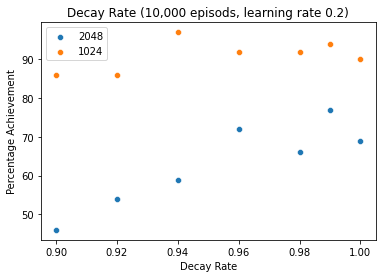

In [22]:
ax = sns.scatterplot(data=results.loc[results['learning_rate'] == 0.2], x='decay', y= 'reached_2048', label = '2048')
ax = sns.scatterplot(data=results.loc[results['learning_rate'] == 0.2], x='decay', y= 'reached_1024', label = '1024')
ax = sns.scatterplot(data=results.loc[results['learning_rate'] == 0.2], x='decay', y= 'reached_4096', label = '4096')
ax = sns.scatterplot(data=results.loc[results['learning_rate'] == 0.2], x='decay', y= 'reached_8192', label = '8192')

#specfiy axis labels
ax.set(xlabel='Decay Rate',
       ylabel='Percentage Achievement',
       title='Decay Rate (10,000 episods, learning rate 0.2)')

plt.savefig('decay_rate.png', dpi = 600)

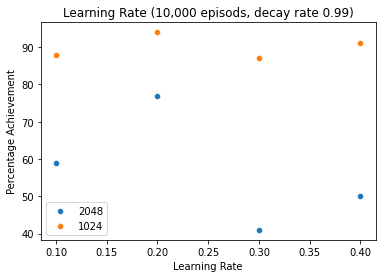

In [24]:
ax = sns.scatterplot(data=results.loc[results['decay'] == 0.99], x='learning_rate', y= 'reached_2048', label = '2048')
ax = sns.scatterplot(data=results.loc[results['decay'] == 0.99], x='learning_rate', y= 'reached_1024', label = '1024')
ax = sns.scatterplot(data=results.loc[results['decay'] == 0.99], x='learning_rate', y= 'reached_4096', label = '4096')
ax = sns.scatterplot(data=results.loc[results['decay'] == 0.99], x='learning_rate', y= 'reached_8192', label = '8192')

#specfiy axis labels
ax.set(xlabel='Learning Rate',
       ylabel='Percentage Achievement',
       title='Learning Rate (10,000 episods, decay rate 0.99)')

plt.savefig('learning_rate.png', dpi = 600)